In [1]:
from pymodulon.core import IcaData
from pymodulon.visualization import *
from pymodulon.io import load_json_model, save_to_json
import pandas as pd

pd.set_option('display.max_rows', 500)

# Load Data

In [2]:
ica_data = load_json_model('../data/p_syringae.json')

In [3]:
go_enrichments = pd.read_csv('../data/GO_enrichments.csv', index_col=0)
kegg_pathway_enrichments = pd.read_csv('../data/kegg_pathway_enrichments.csv', index_col=0)
kegg_module_enrichments = pd.read_csv('../data/kegg_module_enrichments.csv', index_col=0)

# iModulon Investigation

Use this block with any iModulon to attempt to annotate it

In [4]:
print('All iModulons:')
print(ica_data.imodulon_names)

All iModulons:
['Nitrogen', '1', 'Motility', 'Sulfur-1', 'Recombination', '5', 'IS-elements', 'Molybdenum', 'Alginate', 'Resistance', 'Sulfur-2', '11', 'Plasmid A', 'Carb Transport', 'Chaperone', 'Coronatine', '16', '17', 'Nt/Ribosome', 'single_gene_1', 'single_gene_2', 'Fe/Protein Transport', 'Inositol', 'Phage', 'Protocatechuate', 'Flagella-1', 'Fur', 'Bactin', '28', 'Fatty Acid', 'Phosphate', 'Secretion', 'Folate', 'Pyoverdine', '34', 'Flagella-2', 'Translation', 'T3SS', 'Glycan', 'Copper', '40', 'single_gene_3', 'single_gene_4', 'single_gene_5', 'Fe-S']


In [571]:
iM_to_annotate = '44'

## Check GO and KEGG Enrichments

In [572]:
go_enrichments[go_enrichments['imodulon'] == iM_to_annotate]

,imodulon,gene_ontology,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size


In [573]:
kegg_pathway_enrichments[kegg_pathway_enrichments['imodulon'] == iM_to_annotate]

,imodulon,kegg_id,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name
40,44,map04068,0.000016,0.001816,0.500000,0.2,0.285714,2,4,10,FoxO signaling pathway
41,44,map04211,0.000016,0.001816,0.500000,0.2,0.285714,2,4,10,Longevity regulating pathway
42,44,map04213,0.000039,0.003021,0.333333,0.2,0.250000,2,6,10,Longevity regulating pathway - multiple species
43,44,map04212,0.000054,0.003170,0.285714,0.2,0.235294,2,7,10,Longevity regulating pathway - worm
44,44,map04146,0.000115,0.005419,0.200000,0.2,0.200000,2,10,10,Peroxisome
45,44,map04011,0.003384,0.088355,0.500000,0.1,0.166667,1,2,10,MAPK signaling pathway - yeast
46,44,map04013,0.003384,0.088355,0.500000,0.1,0.166667,1,2,10,MAPK signaling pathway - fly
47,44,map04934,0.003384,0.088355,0.500000,0.1,0.166667,1,2,10,Cushing syndrome
48,44,map05211,0.003384,0.088355,0.500000,0.1,0.166667,1,2,10,Renal cell carcinoma


## Show Gene Information for iModulon

In [574]:
ica_data.view_imodulon(iM_to_annotate).sort_values(by='gene_weight', ascending=False)[[
    'start', 'gene_weight', 'gene_name', 'gene_product', 'COG', 'regulator', 'uniprot'
]]

,start,gene_weight,gene_name,gene_product,COG,regulator,uniprot
PSPTO_RS03595,736029,0.127332,PSPTO_RS03595,outer membrane beta-barrel protein,Cell wall/membrane/envelope biogenesis,NaN,A0A099SR93
PSPTO_RS21030,4562312,0.075265,PSPTO_RS21030,DUF4224 domain-containing protein,No COG annotation,NaN,A0A0P9RMP9
PSPTO_RS18500,4040584,-0.074324,PSPTO_RS18500,catalase,Inorganic ion transport and metabolism,NaN,UPI0006210671
PSPTO_RS07495,1567506,-0.075586,fdx,ISC system 2Fe-2S type ferredoxin,Energy production and conversion,PSPTO_RS07465,A0A0P9PPH9
PSPTO_RS12050,2575633,-0.079374,PSPTO_RS12050,hypothetical protein,No COG annotation,NaN,UPI0006AB9479
PSPTO_RS23095,5020901,-0.080749,PSPTO_RS23095,superoxide dismutase,Energy production and conversion,NaN,A0A0Q0BHQ4
PSPTO_RS07500,1567862,-0.082782,iscX,Fe-S cluster assembly protein IscX,Function unknown,PSPTO_RS07465,A0A0N8T401
PSPTO_RS23105,5022007,-0.091751,PSPTO_RS23105,class II fumarate hydratase,Energy production and conversion,NaN,Q87WT2
PSPTO_RS23100,5021513,-0.096106,PSPTO_RS23100,tetratricopeptide repeat protein,Function unknown,NaN,A0A099SWC3
PSPTO_RS23110,5023376,-0.106170,PSPTO_RS23110,hypothetical protein,Function unknown,NaN,A0A0N0WY71


## Plot Gene Weights

<AxesSubplot:xlabel='Gene Start', ylabel='44 Gene Weight'>

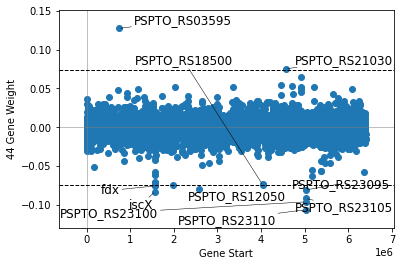

In [575]:
plot_gene_weights(ica_data, iM_to_annotate)

## Plot Activities

<AxesSubplot:ylabel='44 iModulon\nActivity'>

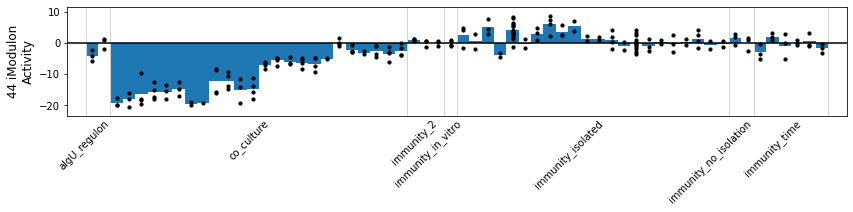

In [576]:
plot_activities(ica_data, iM_to_annotate)

## Plot Regulon

<AxesSubplot:xlabel='36 Gene Weight', ylabel='Number of Genes'>

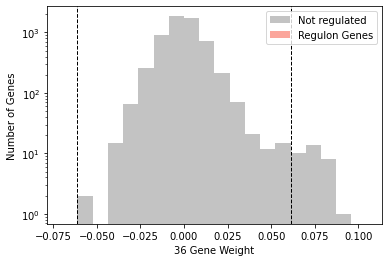

In [516]:
plot_regulon_histogram(ica_data, iM_to_annotate, regulator=iM_to_annotate)

## Rename iModulon

In [577]:
ica_data.rename_imodulons({iM_to_annotate: 'Fe-S'})

In [578]:
save_to_json(ica_data, '../data/p_syringae.json')